# Linear-fitting template

This Notebook provides a template that you can use to fit a set of $x$ and $y$ data to the straight line using the &#8216;least-squares&#8217; method. The following sections provide &#8216;cells&#8217; of Python code that perform different steps of fitting procedure. The results in this Jupyter Notebook are persistent from one cell to the next. You will therefore need to work through all sections in turn and run the code cells in sequence.

## 0 Importing Python libraries

Run code cell 1 to import all of the Python libraries that you will need to perform a least-squares fit of your data. This template makes use of Python built-in libraies NumPy, Matplotlib and SciPy.

In [6]:
#import libraries
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

## 1 Creating a data table

Code cell 2 shows example data from Coulomb&#8217;s law investigation, Table 2.1, entered as tab-delimited rows (this means there is a tab character between each $x$ and $y$ value, and each pair of values is on a new line).

Enter the $x$ and $y$ data that you wish to plot in the same tab-delimited format. Then run code cell 2.

In [7]:
# Paste the data you wish to plot in tab-delimited rows in the format:
#
# x-data	y-data  (separated by a tab character)
#
# In this example, the first column represents the x-data (charging voltages V_HV / kV) 
# and the second column the y-data (charge on the sphere Q / nC).


datalist = """
-20.0	-32.60
-18.0	-30.80
-16.0	-28.90
-14.0	-26.35
-12.0	-23.55
-10.0	-22.10
-8.0	-17.35
-6.0	-12.50
-4.0	-9.00
-2.0	-5.25
0.0	0.00
2.0	3.45
4.0	9.30
6.0	12.75
8.0	16.70
10.0	20.10
12.0	23.85
14.0	26.15
16.0	28.60
18.0	30.60
20.0	32.60
""".split('\n') 


Running code cell 2 will import your data as a list of strings. Now run code cell 3 to split this list into two separate arrays: one array called `x` for your $x$ values; and one array called `y` for your $y$ values.

In [8]:
# Take the list of strings defined above and store it as numbers split in two lists.

x_list = []      # set up an empty list to store x-values
y_list = []      # set up an empty list to store y-values

for s in datalist:
    if s:
        xdat,ydat=s.split()     # split the string into two strings called xdat and ydat
        xdat=float(xdat)        # convert xdat string to float
        ydat=float(ydat)        # convert ydat string to float
        x_list.append(xdat)     # store xdat in the list x_list
        y_list.append(ydat)     # store ydat in the list y_list

# Convert the lists to arrays
x = np.array(x_list)
y = np.array(y_list)

## 2 Plotting the data

Run code cell 4, which takes your `x` and `y` arrays and produces a scatter plot of $y$ versus $x$. (See comments in the code cell if you wish to adjust plot properties such as the font sizes.)

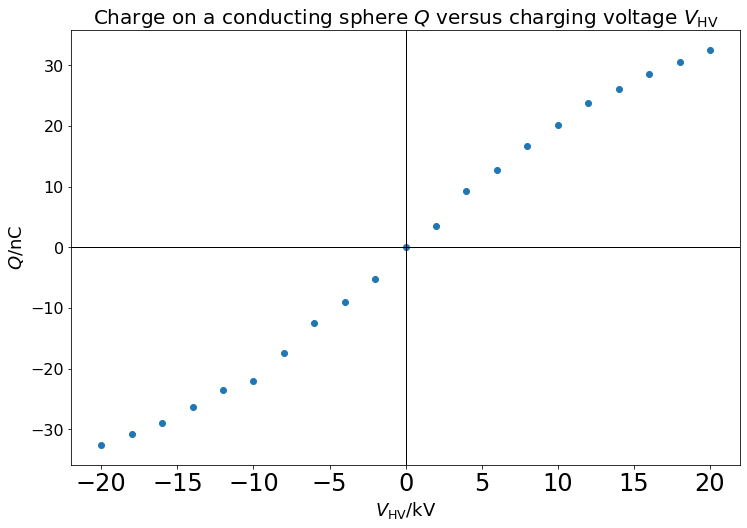

In [10]:
# set up plot display size for subsequent plots:
plt.rcParams['figure.figsize'] = [12, 8]  # set the size of the plot
plt.rcParams['axes.titlesize'] = 20       # set the font size for the title
plt.rcParams['axes.labelsize'] = 18       # set the font size for the axes labels
plt.rcParams['xtick.labelsize'] = 18      # set the font size for the x-axis tick labels
plt.rcParams['ytick.labelsize'] = 16      # set the font size for the y-axis tick labels
plt.rcParams['legend.fontsize'] = 16      # set the font size for the legend

# set up the plot:
plt.axhline(y=0, color = 'black', linewidth = 1)  # draws a horizontal line at y=0
plt.axvline(x=0, color = 'black', linewidth = 1)  #draws a vertical line at x=0
plt.title('Charge on a conducting sphere $Q$ versus charging voltage $V_\mathrm{HV}$')
plt.xlabel('$V_\mathrm{HV}$/kV')
plt.ylabel('$Q$/nC')

# plot data:
plt.scatter(x, y)      # plot the x and y data points
plt.show()

##  Fitting the data to a straight line

The next step uses a least-squared procedure to fit a straight line to the data. This is done  using a function `linregress()` in the `scipy.stats` Python library and takes two columns of data (representing $x$ and $y$ values) and returns the parameters of the least-squares fit. These parameters include:

* the **slope** and **intercept** of the fitted straight line

* the **rvalue** or &#8216;correlation coefficient&#8217; &ndash; a square of this value gives a measure of goodness of fit (the $R^{2}$ value)

* **stderr**, which is the standard ($\pm$) error on the fitted gradient

* **intercept_sterr**, which is the standard ($\pm$)  error on the intercept.

Run code cell 5, which uses fits the `x` and `y` arrays to a straight line and returns the gradient and intercept (with errors) and the $R^2$ value.

Gradient: 1.8083 +/- 0.0395
Intercept: -0.2048 +/- 0.4783
R-squared value: 0.9910


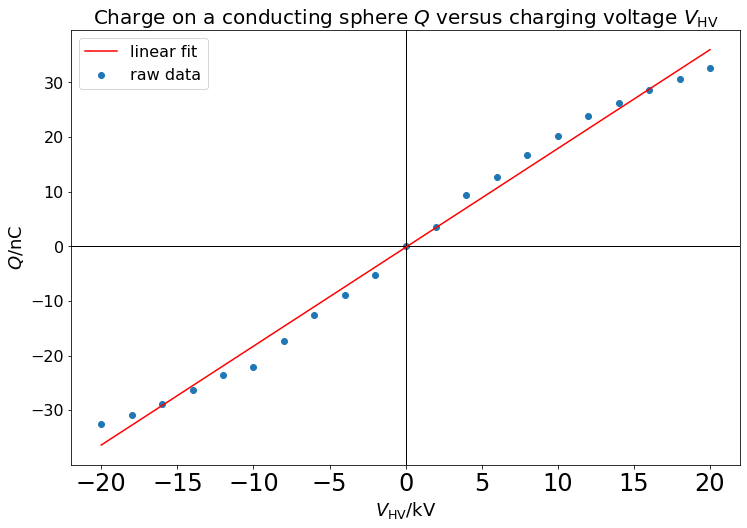

In [11]:
# This single line does the linear regression fit
fit_result = linregress(x, y)

# Print the gradient +/- error, intercept +/- error and R-squared value
print(f'Gradient: {fit_result.slope:.4f} +/- {fit_result.stderr:.4f}')
print(f'Intercept: {fit_result.intercept:.4f} +/- {fit_result.intercept_stderr:.4f}')
print(f'R-squared value: {fit_result.rvalue**2:.4f}')

# Generate the y-data points for the fitted line:
ylin   = fit_result.slope*x + fit_result.intercept

# set up the plot:
plt.axhline(y=0, color='black', linewidth = 1)
plt.axvline(x=0, color='black', linewidth = 1) 
plt.title('Charge on a conducting sphere $Q$ versus charging voltage $V_\mathrm{HV}$')
plt.xlabel('$V_\mathrm{HV}$/kV')
plt.ylabel('$Q$/nC')

# plot data and fitted line
plt.scatter(x, y, label='raw data')                     # plot the data points
plt.plot(x, ylin, color='red', label='linear fit')      # plot the fitted line
plt.legend()
plt.show()

Note down the gradient and intercept (with their errors) and $R^2$ values and save a screenshot of your plotted data with the line of best fit. Alternatively, if you right-click on the plot you can select &#8216;Save the image as&#8230;&#8217; or you can select  &#8216;Copy image&#8217; and paste into into a document.

You can then return to Section&nbsp;1 to enter a different set of data (e.g. from another part of the Coulomb&#8217;s law investigation or from the Hall effect investigation).